In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import requests

In [2]:
month_dict = {"1" : "Jan.", "2" : "Feb.", "3" : "Mar.", "4" : "Apr.", "5" : "May", "6" : "Jun.",
              "7" :"Jul.", "8" : "Aug.", "9" : "Sep.", "10" : "Oct.", "11" : "Nov.", "12" : "Dec."}

In [3]:
us_sales_df = pd.merge(pd.read_csv("data/retail(us).csv"), pd.read_csv("data/online(us).csv"), on = "month")
us_sales_df = us_sales_df.rename(columns = {"vol(mil$)_x" : "Total Retail", "vol(mil$)_y" : "Online"})
us_sales_df["Month"] = us_sales_df.iloc[:, 0].str.split("/", n = 2, expand = True)[0]
us_sales_df["Year"] = us_sales_df.iloc[:, 0].str.split("/", n = 2, expand = True)[2]
us_sales_df = us_sales_df.drop(columns = "month")

for k, v in month_dict.items():
    us_sales_df["Month"] = us_sales_df["Month"].replace(k, v)

us_sales_df.tail()

,Total Retail,Online,Month,Year
120,464062,60985,Jan.,2020
121,461914,61620,Feb.,2020
122,438221,65332,Mar.,2020
123,382734,73479,Apr.,2020
124,448201,78974,May,2020


In [4]:
us_sales_df["Online Share(%)"] = us_sales_df.iloc[:, 1] / us_sales_df.iloc[:, 0] * 100
us_sales_df.head()

,Total Retail,Online,Month,Year,Online Share(%)
0,308529,20726,Jan.,2010,6.717683
1,308520,20742,Feb.,2010,6.723065
2,316269,21521,Mar.,2010,6.804650
3,318612,21458,Apr.,2010,6.734837
4,315356,21459,May,2010,6.804691


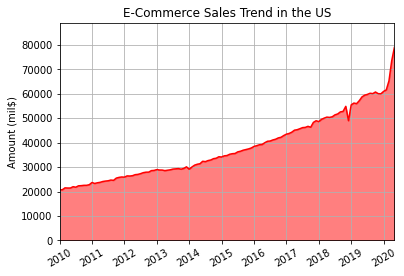

In [5]:
x_label = us_sales_df.iloc[:, 3].unique()
x_axis = us_sales_df.index
y_axis = us_sales_df.iloc[:, 1]
plt.plot(x_axis, y_axis, color = "r")
plt.title("E-Commerce Sales Trend in the US")
plt.ylabel("Amount (mil$)")
plt.xlim(x_axis[0], x_axis[len(x_axis)-1])
plt.ylim(0, y_axis.max()+10000)
plt.grid()
plt.fill_between(x_axis, y_axis, color = "r", alpha = 0.5)
plt.xticks(x_axis[::12], x_label, rotation = 30)
plt.savefig("charts/e-commerce_sales.png", dpi = 200)
plt.show()

In [6]:
us_sales_annual = us_sales_df.iloc[:, 0:4].groupby("Year").sum()
us_sales_annual["Online Share(%)"] = us_sales_annual.iloc[:, 1] / us_sales_annual.iloc[:, 0] * 100
us_sales_annual.head()

,Total Retail,Online,Online Share(%)
Year,,,
2010,3816760,262430,6.875727
2011,4102027,293897,7.164677
2012,4296762,327363,7.618830
2013,4458197,349566,7.840972
2014,4633589,384253,8.292773


In [7]:
year = us_sales_annual.index

for i in range(1, len(year) - 1):
    us_sales_annual.loc[year[i], "Retail Growth(%)"] = (us_sales_annual.loc[year[i], "Total Retail"] - us_sales_annual.loc[year[i-1], "Total Retail"]) / us_sales_annual.loc[year[i-1], "Total Retail"] * 100
    us_sales_annual.loc[year[i], "Online Growth(%)"] = (us_sales_annual.loc[year[i], "Online"] - us_sales_annual.loc[year[i-1], "Online"]) / us_sales_annual.loc[year[i-1], "Online"] * 100

this_year, last_year = (us_sales_annual.tail(2).index[1], us_sales_annual.tail(2).index[0])
num_this_year = len(us_sales_df.loc[us_sales_df.loc[:, "Year"] == this_year].index)

last_retail = us_sales_df.loc[us_sales_df.iloc[:, 3] == last_year].iloc[:num_this_year, 0].sum()
last_online = us_sales_df.loc[us_sales_df.iloc[:, 3] == last_year].iloc[:num_this_year, 1].sum()

us_sales_annual.loc[this_year, "Retail Growth(%)"] = (us_sales_annual.tail(1).iloc[0, 0] - last_retail) / last_retail * 100
us_sales_annual.loc[this_year, "Online Growth(%)"] = (us_sales_annual.tail(1).iloc[0, 1] - last_online) / last_online * 100

us_sales_annual.head()

,Total Retail,Online,Online Share(%),Retail Growth(%),Online Growth(%)
Year,,,,,
2010,3816760,262430,6.875727,NaN,NaN
2011,4102027,293897,7.164677,7.474062,11.990626
2012,4296762,327363,7.618830,4.747287,11.386983
2013,4458197,349566,7.840972,3.757132,6.782379
2014,4633589,384253,8.292773,3.934146,9.922876


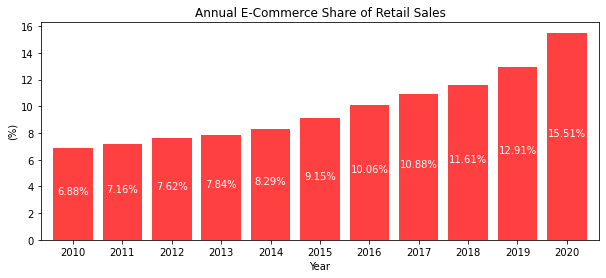

In [8]:
ax = us_sales_annual.iloc[:, 2].plot(kind = "bar", width = 0.8, figsize=(10,4), color = "r", alpha = 0.75)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(height, 2))+"%", (left+width/2, height/2), ha='center', color = "white")

plt.title("Annual E-Commerce Share of Retail Sales")
plt.ylabel("(%)")
plt.xticks(rotation = 0)
plt.savefig("charts/e-commerce_share.png", dpi = 200)
plt.show()

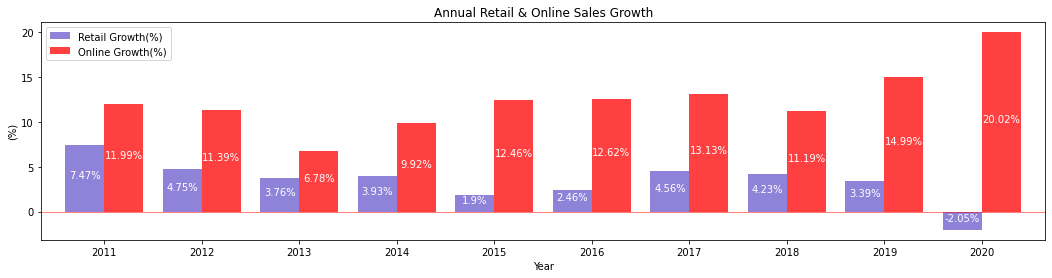

In [9]:
ax = us_sales_annual.iloc[1:, [3, 4]].plot(kind = "bar", width = 0.8, figsize=(18,4), color = ["slateblue", "r"], alpha = 0.75)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(height, 2))+"%", (left+width/2, height/2), ha='center', color = "white")

plt.title("Annual Retail & Online Sales Growth")
plt.axhline(y=0, color='red', linewidth=0.5)
plt.ylabel("(%)")
plt.xticks(rotation = 0)
plt.savefig("charts/sales_growth.png", dpi = 200)
plt.show()

In [10]:
us_sales_a_year = us_sales_df.tail(13).copy()
us_sales_a_year["Month"] = us_sales_a_year.loc[:, "Month"] + ", " + us_sales_a_year.loc[:, "Year"]
us_sales_a_year = us_sales_a_year.drop(columns = "Year").set_index("Month")

idx = us_sales_a_year.index

for i in range(1, len(idx)):
    us_sales_a_year.loc[idx[i], "Retail Growth(%)"] = (us_sales_a_year.iloc[i, 0] - us_sales_a_year.iloc[i-1, 0]) / us_sales_a_year.iloc[i-1, 0] * 100
    us_sales_a_year.loc[idx[i], "Online Growth(%)"] = (us_sales_a_year.iloc[i, 1] - us_sales_a_year.iloc[i-1, 1]) / us_sales_a_year.iloc[i-1, 1] * 100

us_sales_a_year = us_sales_a_year.dropna()
us_sales_a_year

,Total Retail,Online,Online Share(%),Retail Growth(%),Online Growth(%)
Month,,,,,
"Jun., 2019",454256,59446,13.086453,0.233231,1.205353
"Jul., 2019",457485,59770,13.064909,0.710833,0.545032
"Aug., 2019",459938,60229,13.095026,0.536192,0.767944
"Sep., 2019",457277,60090,13.140831,-0.578556,-0.230786
"Oct., 2019",459978,60750,13.207153,0.590670,1.098352
"Nov., 2019",460760,60069,13.036939,0.170008,-1.120988
"Dec., 2019",460512,60012,13.031582,-0.053824,-0.094891
"Jan., 2020",464062,60985,13.141563,0.770881,1.621342
"Feb., 2020",461914,61620,13.340146,-0.462869,1.041240


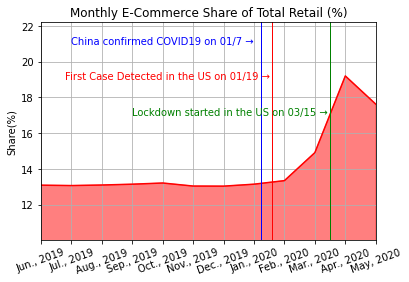

In [11]:
x_axis = us_sales_a_year.index
y_axis = us_sales_a_year.iloc[:, 2]

plt.plot(x_axis, y_axis, color = "r")
plt.title("Monthly E-Commerce Share of Total Retail (%)")
plt.ylabel("Share(%)")
plt.xlim(x_axis[0], x_axis[len(x_axis)-1])
plt.ylim(y_axis.min() - 3, y_axis.max() + 3)
plt.xticks(rotation = 20)
plt.grid()
plt.axvline(x=7.22, color='blue', linewidth=1)
plt.annotate("China confirmed COVID19 on 01/7 →", (1, 21), color = "blue")
plt.axvline(x=7.6, color='red', linewidth=1)
plt.annotate("First Case Detected in the US on 01/19 →", (0.8, 19), color = "red")
plt.axvline(x=9.5, color='green', linewidth=1)
plt.annotate("Lockdown started in the US on 03/15 →", (3, 17), color = "green")
plt.fill_between(x_axis, y_axis, color = "r", alpha = 0.5)
plt.savefig("charts/m_e-commerce_share.png", dpi = 200)
plt.show()

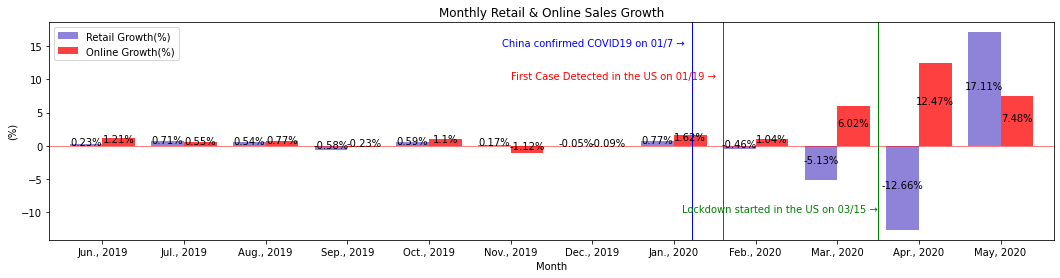

In [12]:
ax = us_sales_a_year.iloc[:, [3, 4]].plot(kind = "bar", width = 0.8, figsize=(18,4), color = ["slateblue", "r"], alpha = 0.75)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(height, 2))+"%", (left+width/2, height/2), ha='center', color = "black")

plt.title("Monthly Retail & Online Sales Growth")
plt.axhline(y=0, color='red', linewidth=0.5)
plt.ylabel("(%)")
plt.xticks(rotation = 0)
plt.axvline(x=7.22, color='blue', linewidth=1)
plt.annotate("China confirmed COVID19 on 01/7 →", (4.9, 15), color = "blue")
plt.axvline(x=7.6, color='red', linewidth=1)
plt.annotate("First Case Detected in the US on 01/19 →", (5, 10), color = "red")
plt.axvline(x=9.5, color='green', linewidth=1)
plt.annotate("Lockdown started in the US on 03/15 →", (7.1, -10), color = "green")
plt.savefig("charts/m_sales_growth.png", dpi = 200)
plt.show()